In [1]:
%cd ..

/home/ubuntu/ppc-experiments-utah/ppc_experiments


In [2]:
import argparse
import collections
import lightning
import numpy as np
import pyro
import torch
import logger, train

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.12.1-git20200711.33e2d80-dfsg1-0.6 is an invalid version and will not be supported in a future release
  warnings.warn(
Seed set to 123


In [3]:
# pyro.enable_validation(True)
# torch.autograd.set_detect_anomaly(True)

In [4]:
config, (data, model, trainer) = train.from_file("experiments/ppc_flowers_config.json")

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.12.1-git20200711.33e2d80-dfsg1-0.6 is an invalid version and will not be supported in a future release
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5]:
logger = config.get_logger('valid')

In [6]:
trainer.fit(model, data, ckpt_path="saved/models/FlowersDiffusion_Ppc/0518_064135/checkpoint_979.ckpt")

You are using a CUDA device ('NVIDIA H100 80GB HBM3') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
[rank: 0] Seed set to 123
Initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/8
You are using a CUDA device ('NVIDIA H100 80GB HBM3') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
You are using a CUDA device ('NVIDIA H100 80GB HBM3') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off p

Sanity Checking: |                                                                                            …

/home/ubuntu/.local/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/home/ubuntu/.local/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/home/ubuntu/.local/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR:

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_epochs=1000` reached.


In [7]:
model.graph.clear()
model.eval()
model.cuda()

LightningPpc(
  (graph): DiffusionPpc(
    (diffusion): DiffusionStep(
      (unet): ScoreNetwork0(
        (_convs): ModuleList(
          (0): Sequential(
            (0): Conv2d(4, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): LogSigmoid()
          )
          (1): Sequential(
            (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (2): LogSigmoid()
          )
          (2): Sequential(
            (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            (1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (2): LogSigmoid()
          )
          (3): Sequential(
            (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            (1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (2): LogSigmoi

In [8]:
xs, _, _ = list(data.val_dataloader())[0]
xs = xs.to(model.device)

In [9]:
B = len(xs)

In [10]:
with model.graph.condition(X__0=xs) as predictive:
    predictive(B=len(xs), lr=1e-8, mode="prior", P=model.num_particles)
    trace, log_weight = predictive(B=len(xs), lr=1e-8, P=model.num_particles)
logger.info("Free energy of reconstruction: %.2E" % -log_weight.mean())
x_hats = trace.nodes['X__0']['fn'].base_dist.loc.mean(dim=0)

/home/ubuntu/.local/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Free energy of reconstruction: 1.65E+15


In [11]:
import matplotlib.pyplot as plt

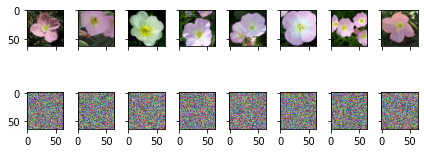

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=8, sharex="all", sharey="all", layout="tight")

for i in range(8):
    orgs = data.reverse_transform(xs[i].squeeze().detach().cpu())
    estimates = data.reverse_transform(x_hats[i].squeeze().detach().cpu())
    axes[0, i].imshow(orgs)
    axes[1, i].imshow(estimates)

fig.savefig("ppc_flowers_recons.pdf", bbox_inches="tight")
plt.show()

In [13]:
del log_weight
del trace
del xs
del x_hats

In [14]:
model.graph.clear()

In [15]:
x_hats = model.graph(B=B, lr=1e-8, mode="prior", P=model.num_particles).mean(dim=0)

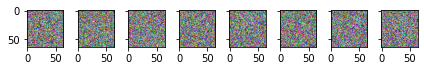

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=8, sharex="all", sharey="all", layout="tight")

for i in range(8):
    estimates = data.reverse_transform(x_hats[i].squeeze().detach().cpu())
    axes[i].imshow(estimates)

fig.savefig("ppc_flowers_samples.pdf", bbox_inches="tight")
plt.show()

In [17]:
del estimates
del x_hats

In [18]:
SEEDS = [123, 456, 789, 101112, 131415]

In [19]:
LOG_LIKELIHOODS = torch.zeros(len(SEEDS), requires_grad=False)
MEAN_SQUARED_ERROR = torch.zeros(len(SEEDS), requires_grad=False)

In [20]:
for (s, SEED) in enumerate(SEEDS):
    torch.manual_seed(SEED)
    np.random.seed(SEED)
    for b, (xs, target, indices) in enumerate(data.val_dataloader()):
        xs = xs.to(model.device)
        with model.graph.condition(X__0=xs) as predictive:
            predictive(B=len(xs), lr=1e-8, mode="prior", P=model.num_particles)
            trace, log_weight = predictive(B=len(xs), lr=1e-8, P=model.num_particles)
        model.graph.clear()
        x_hats = trace.nodes['X__0']['value'].mean(dim=0)

        LOG_LIKELIHOODS[s] += trace.nodes['X__0']['fn'].log_prob(xs).sum().cpu()
        MEAN_SQUARED_ERROR[s] += ((xs - x_hats) ** 2).sum(dim=0).mean().cpu()

        del xs
        del x_hats
        del target
        del indices
        del log_weight
        del trace
        torch.cuda.empty_cache()

        logger.info("Evaluated likelihood for valid batch %d under seed %s" % (b, s))

    LOG_LIKELIHOODS[s] /= len(trainer.valid_data_loader.sampler)
    MEAN_SQUARED_ERROR[s] /= len(trainer.valid_data_loader.sampler)

Evaluated likelihood for valid batch 0 under seed 0
Evaluated likelihood for valid batch 1 under seed 0
Evaluated likelihood for valid batch 2 under seed 0
Evaluated likelihood for valid batch 3 under seed 0
Evaluated likelihood for valid batch 4 under seed 0
Evaluated likelihood for valid batch 5 under seed 0
Evaluated likelihood for valid batch 6 under seed 0
Evaluated likelihood for valid batch 7 under seed 0
Evaluated likelihood for valid batch 8 under seed 0
Evaluated likelihood for valid batch 9 under seed 0
Evaluated likelihood for valid batch 10 under seed 0
Evaluated likelihood for valid batch 11 under seed 0
Evaluated likelihood for valid batch 12 under seed 0
Evaluated likelihood for valid batch 13 under seed 0


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 

In [ ]:
LOG_LIKELIHOODS.mean(), LOG_LIKELIHOODS.std()

In [ ]:
MEAN_SQUARED_ERROR.mean(), MEAN_SQUARED_ERROR.std()